In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings ("ignore")

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/nunompmoniz/ElectionData/master/ElectionData.csv")

In [3]:
data.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [4]:
data.shape

(21643, 28)

In [5]:
data.dtypes
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


In [6]:
data.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

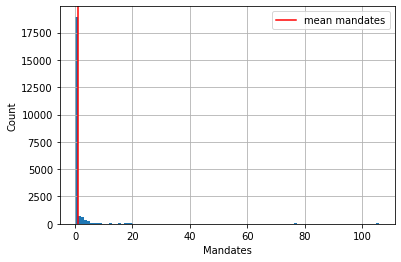

In [7]:
fee=data["FinalMandates"].hist(bins=100)
mean_mandates=np.mean(data["FinalMandates"])
plt.axvline(mean_mandates, color="red", label="mean mandates")
plt.xlabel("Mandates")
plt.ylabel("Count")
plt.legend()
plt.show()

In [8]:
data.territoryName.value_counts().nunique()

7

In [9]:
data.groupby("territoryName")["FinalMandates"].aggregate(["mean", max, min, "count", "std"])

,mean,max,min,count,std
territoryName,,,,,
Aveiro,0.800000,7,0,1080,1.965598
Açores,0.294118,3,0,799,0.824045
Beja,0.176471,2,0,918,0.513091
Braga,0.904762,8,0,1134,2.349384
Bragança,0.166667,2,0,972,0.500257
Castelo Branco,0.222222,3,0,972,0.711825
Coimbra,0.450000,5,0,1080,1.244562
Faro,0.473684,5,0,1026,1.272520
Guarda,0.157895,2,0,1026,0.488323


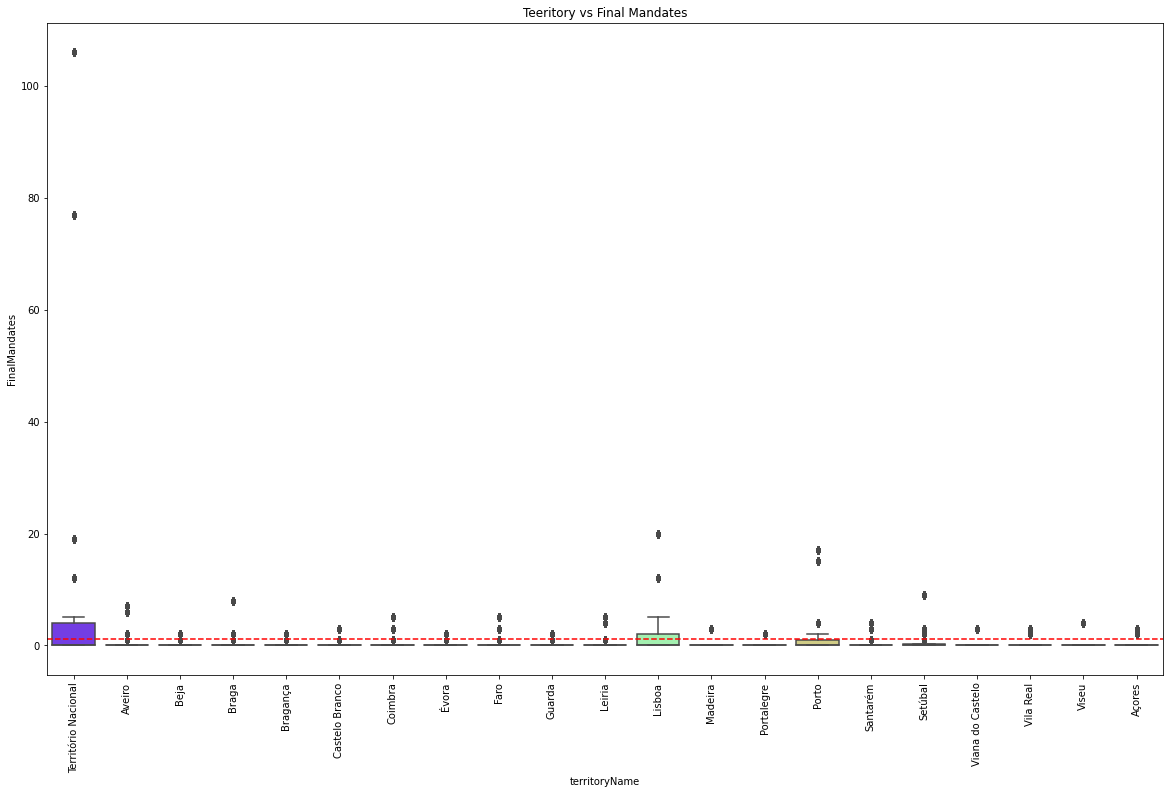

In [10]:
import seaborn as sns
plt.figure(figsize=(20,12))
mean_fee=np.mean(data["FinalMandates"])
sns.boxplot(x="territoryName", y="FinalMandates", data=data, palette="rainbow")
plt.axhline(mean_fee, color="red", linestyle="dashed")
plt.title("Teeritory vs Final Mandates")
plt.xticks(rotation="vertical")
plt.show()

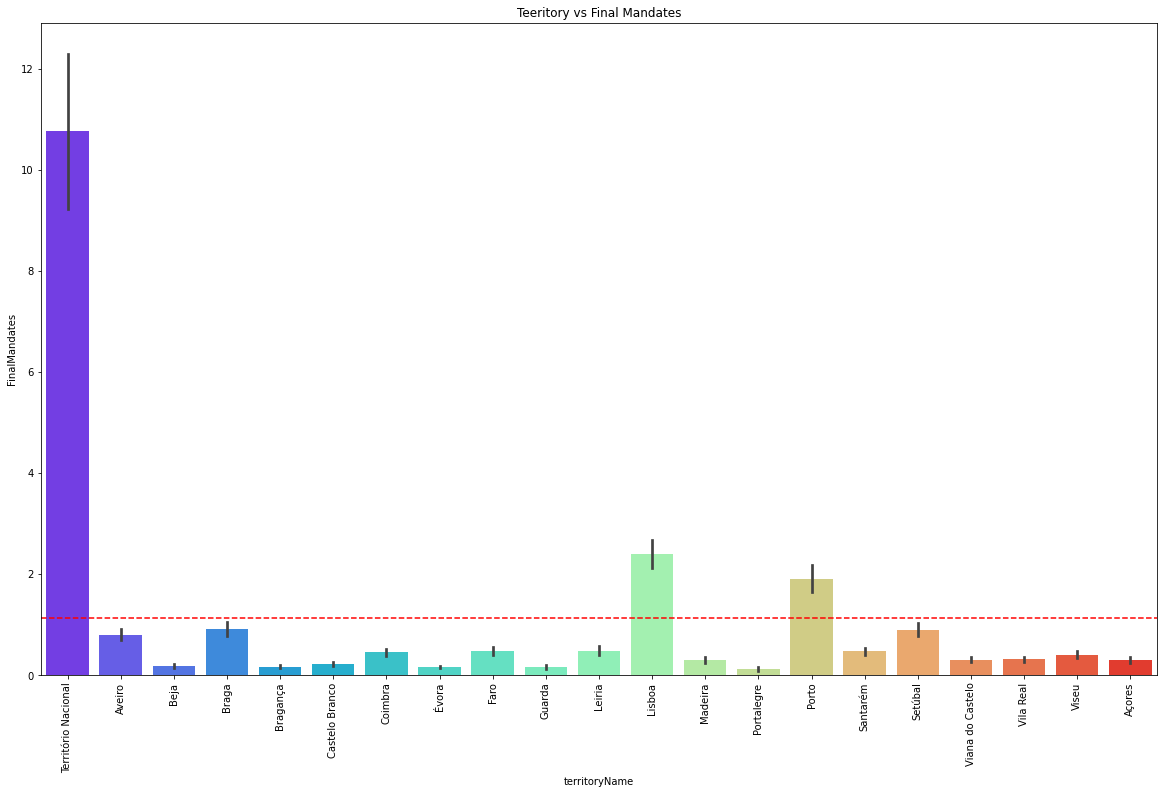

In [11]:
import seaborn as sns
plt.figure(figsize=(20,12))
mean_fee=np.mean(data["FinalMandates"])
sns.barplot(x="territoryName", y="FinalMandates", data=data, palette="rainbow")
plt.axhline(mean_fee, color="red", linestyle="dashed")
plt.title("Teeritory vs Final Mandates")
plt.xticks(rotation="vertical")
plt.show()

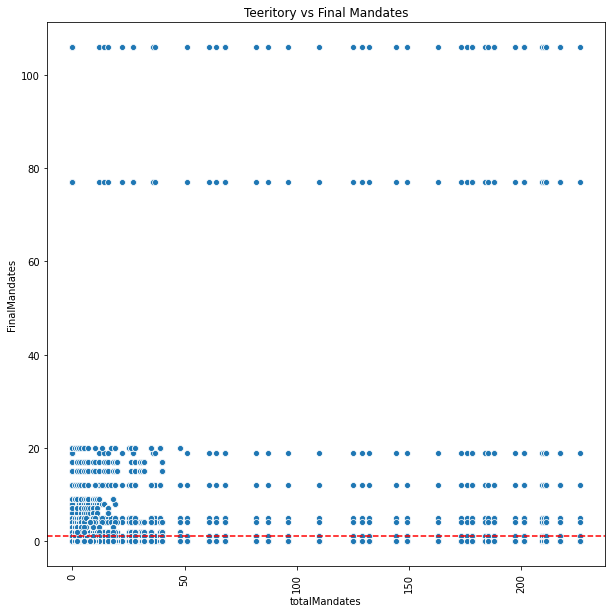

In [12]:
import seaborn as sns
plt.figure(figsize=(10,10))
mean_fee=np.mean(data["FinalMandates"])
sns.scatterplot(x="totalMandates", y="FinalMandates", data=data, palette="rainbow")
plt.axhline(mean_fee, color="red", linestyle="dashed")
plt.title("Teeritory vs Final Mandates")
plt.xticks(rotation="vertical")
plt.show()

In [13]:
data.Party.value_counts().nunique()

7

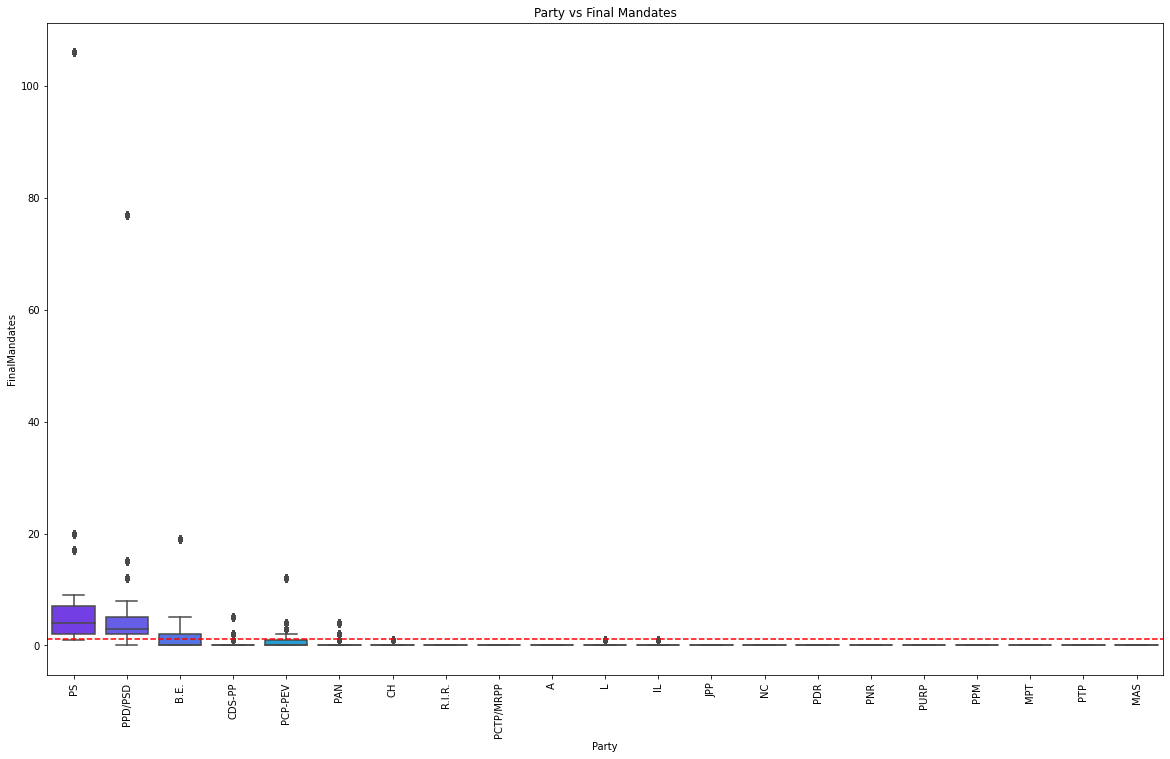

In [14]:
import seaborn as sns
plt.figure(figsize=(20,12))
mean_fee=np.mean(data["FinalMandates"])
sns.boxplot(x="Party", y="FinalMandates", data=data, palette="rainbow")
plt.axhline(mean_fee, color="red", linestyle="dashed")
plt.title("Party vs Final Mandates")
plt.xticks(rotation="vertical")
plt.show()

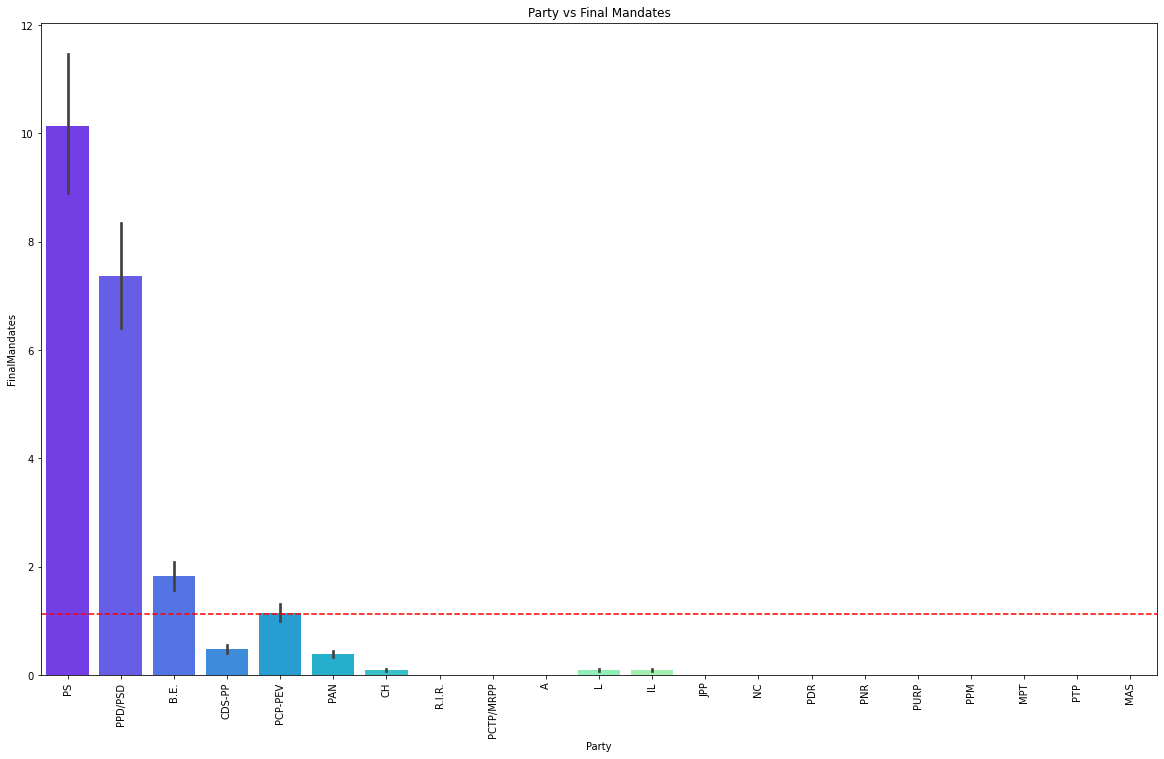

In [15]:
import seaborn as sns
plt.figure(figsize=(20,12))
mean_fee=np.mean(data["FinalMandates"])
sns.barplot(x="Party", y="FinalMandates", data=data, palette="rainbow")
plt.axhline(mean_fee, color="red", linestyle="dashed")
plt.title("Party vs Final Mandates")
plt.xticks(rotation="vertical")
plt.show()

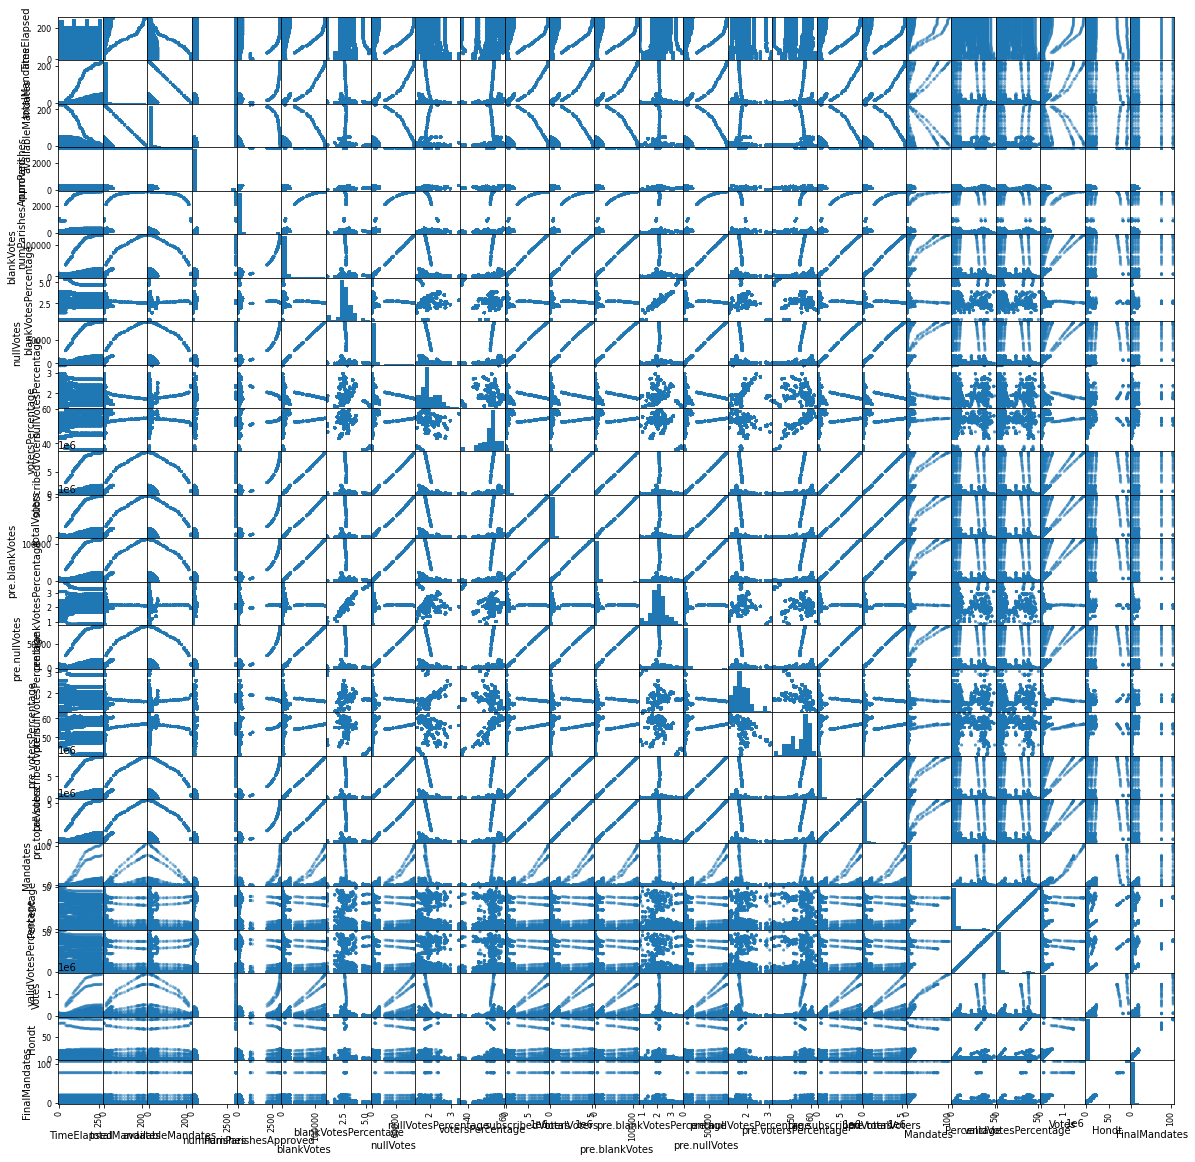

In [16]:
scatter_matrix(data, figsize=(20,20))
plt.show()

In [17]:
corrmat=data.corr()

<AxesSubplot:>

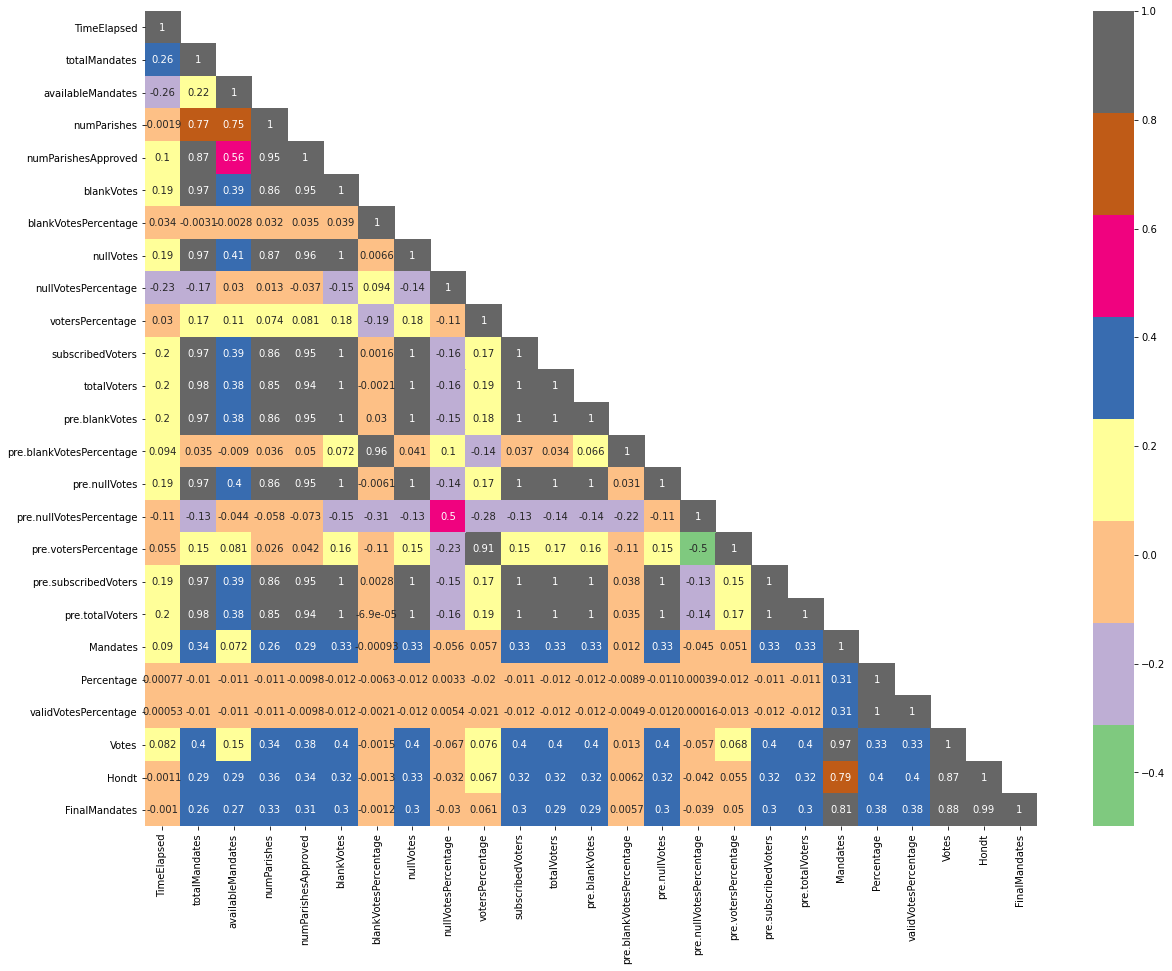

In [18]:
plt.figure(figsize=(20,15))
m=np.ones_like(corrmat)
m[np.tril_indices_from(m)]=0
sns.heatmap(corrmat, annot=True, cmap="Accent", mask=m)

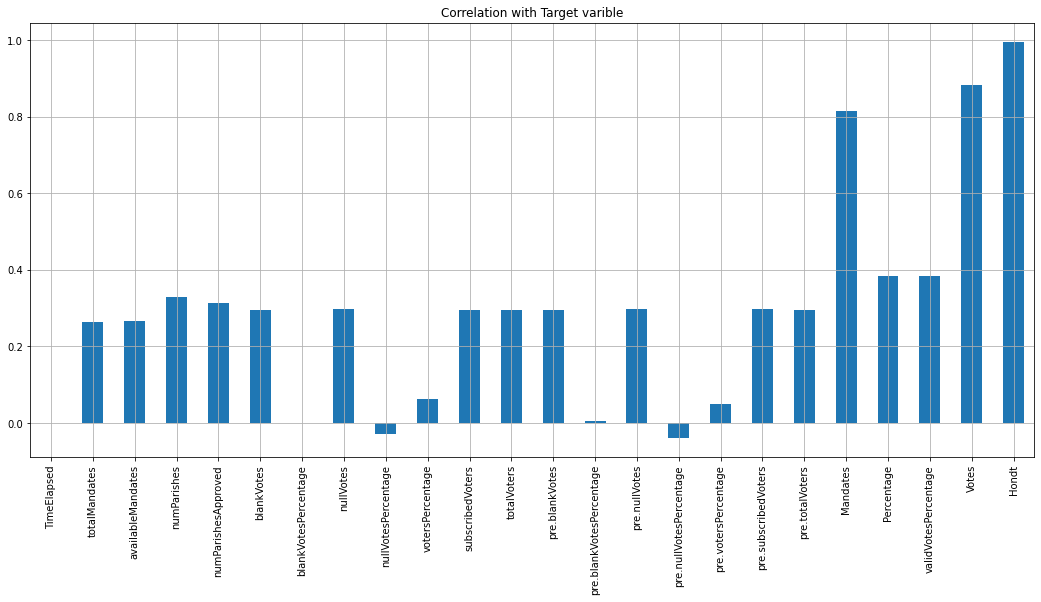

In [19]:
#corelation of preidictors with target varible
plt.figure(figsize=(18,8))
data.drop("FinalMandates",axis=1).corrwith(data["FinalMandates"]).plot(kind="bar", grid=True)
plt.xticks(rotation="vertical")
plt.title("Correlation with Target varible")
plt.show()

In [20]:
print("Observation: from the scatterplots of the dataset and correlation matrix, we can say, most of the all variables are positvely corelated (except null votes percentage and prenull votes percentage, to the dependent variable 'Final Mandates', among all the variables 'Hondt'- Number of MP's according to the distribution of votes now, has higher correlation value with target variable which is .99 and then 'Votes'- Percentage of party votes  and 'Mandates'-MP's elected at the moment for the party in a given district, that have correlation value .88 and .81 respectively."  )

Observation: from the scatterplots of the dataset and correlation matrix, we can say, most of the all variables are positvely corelated (except null votes percentage and prenull votes percentage, to the dependent variable 'Final Mandates', among all the variables 'Hondt'- Number of MP's according to the distribution of votes now, has higher correlation value with target variable which is .99 and then 'Votes'- Percentage of party votes  and 'Mandates'-MP's elected at the moment for the party in a given district, that have correlation value .88 and .81 respectively.


In [21]:
data.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [22]:
data.drop(columns=['TimeElapsed', 'time','numParishes','blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage','pre.blankVotesPercentage', 'pre.nullVotesPercentage',
       'pre.votersPercentage'], inplace=True)

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data["territoryName"])
data["territoryName"]=le.fit_transform(data["territoryName"])

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data["Party"])
data["Party"]=le.fit_transform(data["Party"])

In [28]:
#to handle the outliers
from scipy.stats import zscore
z=abs(zscore(data))
data_mod=data[(z<3).all(axis=1)]

In [29]:
data.shape, data_mod.shape

((21643, 18), (18715, 18))

In [30]:
X=data.drop(columns="FinalMandates")
y=data.FinalMandates

In [31]:
#performing standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_=sc.fit_transform(X)
X_mod=pd.DataFrame(X_, columns=X.columns)

In [32]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test=split(X_mod,y, random_state=123, test_size=.2)

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score,roc_auc_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score

In [34]:
model=[LinearRegression(), Ridge(), Lasso(), ElasticNet(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]

In [35]:
for m in model:
    m.fit(X_train, y_train)
    score=m.score(X_train, y_train)
    y_pred=m.predict(X_test)
    print("For Model:", m,"Score:", score)
    print("R2 Score:", r2_score(y_test, y_pred))
    print("Mean_Absolute Error", mean_absolute_error(y_test, y_pred))
    print("Mean_Squared_error:", np.sqrt(y_test, y_pred))

For Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) Score: 0.9932007535475954
R2 Score: 0.9929976288089308
Mean_Absolute Error 0.17814129757816086
Mean_Squared_error: 13751    0.000000
4349     0.000000
1199     1.414214
8893     0.000000
2260     1.732051
           ...   
7251     0.000000
6104     0.000000
11366    0.000000
18252    1.000000
265      0.000000
Name: FinalMandates, Length: 4329, dtype: float64
For Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) Score: 0.9932004194837754
R2 Score: 0.992986769996828
Mean_Absolute Error 0.1779635067903217
Mean_Squared_error: 13751    0.000000
4349     0.000000
1199     1.414214
8893     0.000000
2260     1.732051
           ...   
7251     0.000000
6104     0.000000
11366    0.000000
18252    1.000000
265      0.000000
Name: FinalMandates, Length: 4329, dtype: float64
For Model: Lasso(alpha=1.0, copy_X=True, 

In [36]:
print("Observation: Random Forest Rgressor is giving highest score and r2 score.")

Observation: Random Forest Rgressor is giving highest score and r2 score.


In [ ]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test=split(X_mod,y, random_state=92, test_size=.2)
final_model=ElasticNet()
final_model.fit(X_train, y_train)
final_model.score(X_train, y_train)
y_pred=final_model.predict(X_test)
print("for Model",final_model , "Accuracy Score:", r2_score(y_test,y_pred))
print("mse:",mean_absolute_error(y_test, y_pred))
print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.externals import joblib
joblib.dump(final_model, "Election_Final_Mandates_predictor.obj")